In [37]:
import pandas as pd
import numpy as np

In [38]:
all_player_data = pd.read_csv('all_player_data.csv')
all_player_data

,Unnamed: 0,name,position,team,assists,bonus,bps,clean_sheets,creativity,element,...,was_home,yellow_cards,gameweek,season,starts,opponent_team_name,difficulty,opponent_difficulty,score,opponent_score
0,0,Ozan Tufan,MID,Watford,0,0,0,0,0.0,557,...,False,0,27,2021-22,NaN,Man Utd,4.0,2.0,0.0,0.0
1,1,Andre Gray,FWD,Watford,0,0,0,0,0.0,383,...,False,0,27,2021-22,NaN,Man Utd,4.0,2.0,0.0,0.0
2,2,Willy Boly,DEF,Wolves,0,0,0,0,0.0,428,...,False,0,27,2021-22,NaN,West Ham,3.0,3.0,0.0,1.0
3,3,Mads Roerslev Rasmussen,DEF,Brentford,0,0,0,0,0.0,89,...,True,0,27,2021-22,NaN,Newcastle,2.0,2.0,0.0,2.0
4,4,Sam Byram,DEF,Norwich,0,0,0,0,0.0,321,...,False,0,27,2021-22,NaN,Southampton,3.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95537,101513,Max Meyer,MID,Crystal Palace,0,0,0,0,0.0,143,...,False,0,23,2020-21,NaN,Leeds,3.0,2.0,0.0,2.0
95538,101514,Hakim Ziyech,MID,Chelsea,0,0,0,0,0.0,114,...,False,0,23,2020-21,NaN,Sheffield Utd,2.0,4.0,2.0,1.0
95539,101515,Jonny Evans,DEF,Leicester,0,1,25,1,1.3,219,...,False,1,23,2020-21,NaN,Wolves,3.0,4.0,0.0,0.0
95540,101516,Kyle Edwards,MID,West Brom,0,0,0,0,0.0,421,...,False,0,23,2020-21,NaN,Spurs,4.0,2.0,0.0,2.0


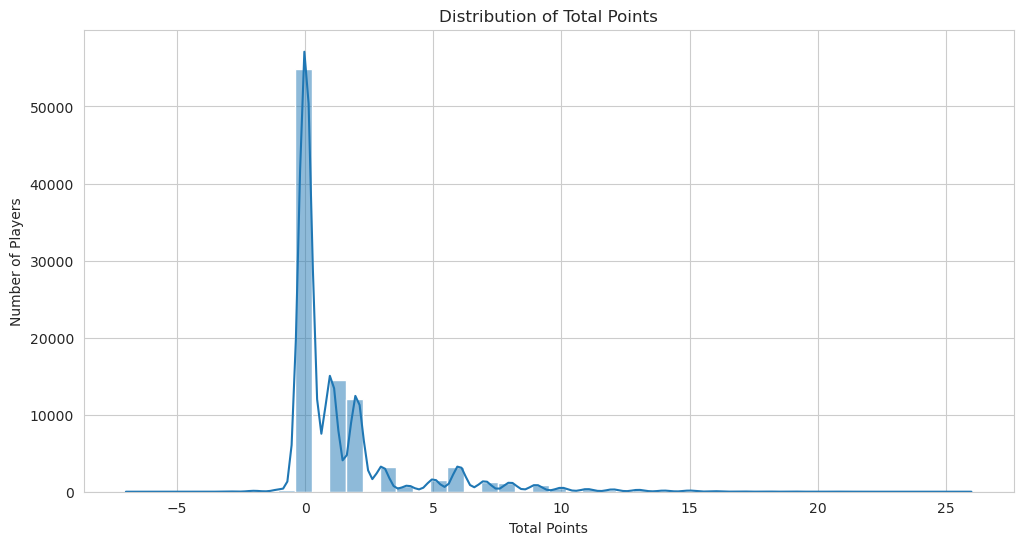

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for seaborn plots
sns.set_style("whitegrid")

# Plotting the distribution of the target variable 'total_points'
plt.figure(figsize=(12, 6))
sns.histplot(all_player_data['total_points'], bins=50, kde=True)
plt.title("Distribution of Total Points")
plt.xlabel("Total Points")
plt.ylabel("Number of Players")
plt.show()

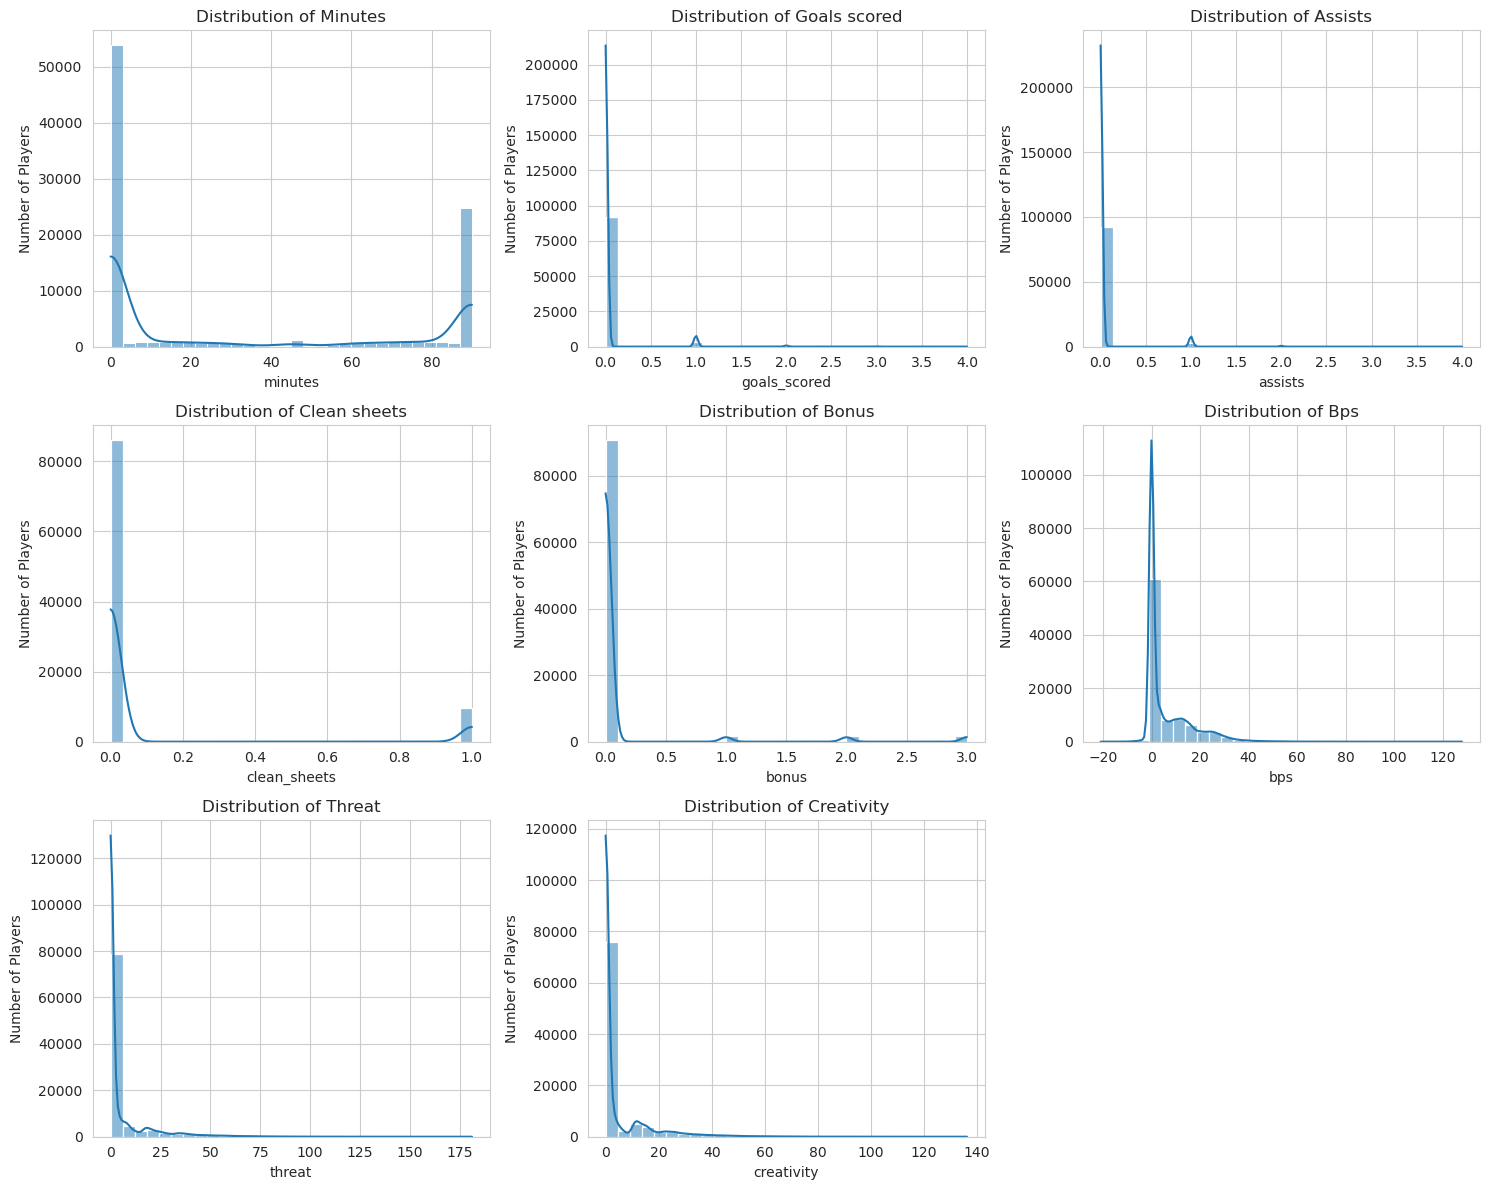

In [40]:
# Plotting the distributions of key features
features_to_plot = ['minutes', 'goals_scored', 'assists', 'clean_sheets', 'bonus', 'bps', 'threat', 'creativity']

plt.figure(figsize=(15, 12))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(all_player_data[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature.replace('_', ' ').capitalize()}")
    plt.ylabel("Number of Players")
    plt.tight_layout()

plt.show()


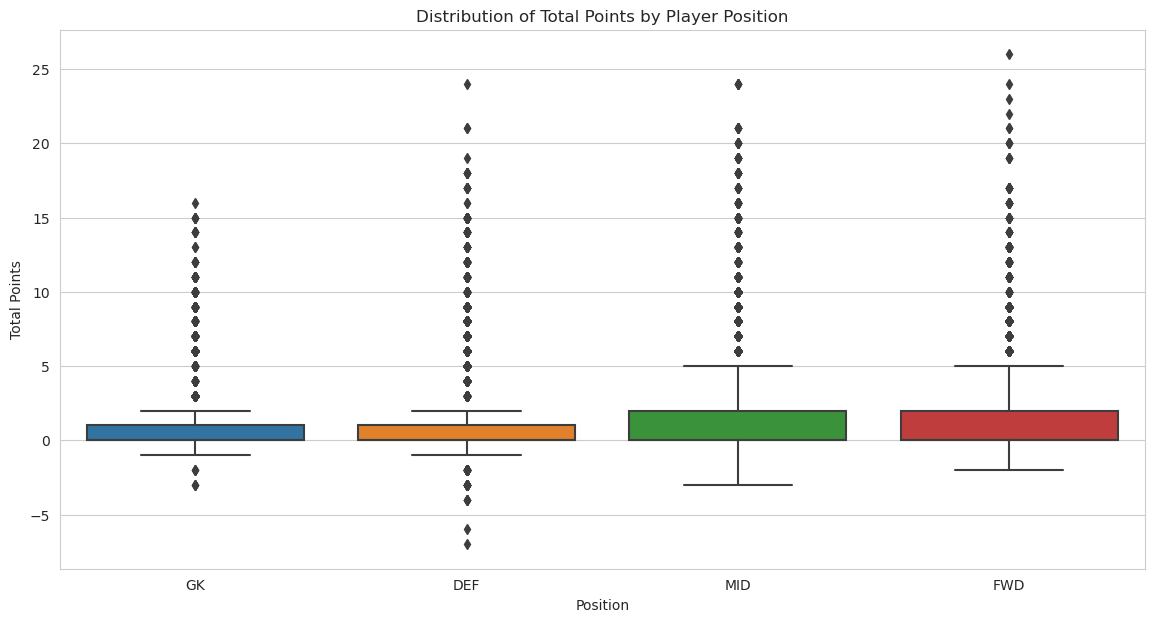

In [41]:
# Visualizing the distribution of total points across different player positions
plt.figure(figsize=(14, 7))
sns.boxplot(data=all_player_data, x='position', y='total_points', order=['GK', 'DEF', 'MID', 'FWD'])
plt.title('Distribution of Total Points by Player Position')
plt.xlabel('Position')
plt.ylabel('Total Points')
plt.show()


## Feature Engineering portion

In [42]:
# Creating a recent form metric to gauge player form, consider last 3 matches
def generate_form_feature(df, form_range=3):
    df = df.sort_values(by=['name', 'season', 'gameweek'])
    # Calculate the rolling average points over the last 3 matches for each player, excluding the current gameweek
    df['form_last_3'] = df.groupby('name')['total_points'].apply(lambda x: x.shift(1).rolling(window=form_range, min_periods=1).mean())
    return df


sample_player_form = generate_form_feature(all_player_data)[all_player_data['name'] == 'Aaron Ramsdale'][['name', 'season', 'gameweek', 'total_points', 'form_last_3']]
sample_player_form.head(10)

/tmp/ipykernel_10035/1091946193.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['form_last_3'] = df.groupby('name')['total_points'].apply(lambda x: x.shift(1).rolling(window=form_range, min_periods=1).mean())
/tmp/ipykernel_10035/1091946193.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sample_player_form = generate_form_feature(all_player_data)[all_player_data['name'] == 'Aaron Ramsdale'][['name', 'season', 'gameweek', 'total_points', 'form_last_3']]


,name,season,gameweek,total_points,form_last_3
54151,Aaron Ramsdale,2019-20,1,2,NaN
63836,Aaron Ramsdale,2019-20,2,4,2.000000
57602,Aaron Ramsdale,2019-20,3,1,3.000000
64234,Aaron Ramsdale,2019-20,4,1,2.333333
58413,Aaron Ramsdale,2019-20,5,3,2.000000
64634,Aaron Ramsdale,2019-20,6,10,1.666667
57195,Aaron Ramsdale,2019-20,7,2,4.666667
56306,Aaron Ramsdale,2019-20,8,2,5.000000
59246,Aaron Ramsdale,2019-20,9,6,4.666667
58000,Aaron Ramsdale,2019-20,10,8,3.333333


In [43]:
# Categorizing difficulty
def categorize_difficulty(difficulty):
    if difficulty in [1, 2]:
        return 'Low Difficulty'
    elif difficulty == 3:
        return 'Medium Difficulty'
    else:
        return 'High Difficulty'

def generate_difficulty_feature(df):
    df['difficulty_category'] = df['difficulty'].apply(categorize_difficulty)
    df = df.sort_values(by=['name', 'season', 'gameweek'])
    avg_against_diff = df.groupby(['name', 'difficulty_category'])['total_points'].mean().reset_index(name='avg_points_against_difficulty')
    return pd.merge(df, avg_against_diff, on=['name', 'difficulty_category'], how='left')
    

# Extracting a sample for the Performance Against Opponents of Similar Difficulty feature
all_player_data = generate_form_feature(all_player_data)
difficulty_performance = generate_difficulty_feature(all_player_data)
performance_against_difficulty_sample = difficulty_performance[['name', 'element','season', 'gameweek', 'total_points', 'avg_points_against_difficulty', 'difficulty', 'difficulty_category']].head(20)
performance_against_difficulty_sample

difficulty_performance.columns

/tmp/ipykernel_10035/1091946193.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['form_last_3'] = df.groupby('name')['total_points'].apply(lambda x: x.shift(1).rolling(window=form_range, min_periods=1).mean())


Index(['Unnamed: 0', 'name', 'position', 'team', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'minutes', 'opponent_team',
       'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards',
       'round', 'saves', 'selected', 'team_a_score', 'team_h_score', 'threat',
       'total_points', 'transfers_balance', 'transfers_in', 'transfers_out',
       'value', 'was_home', 'yellow_cards', 'gameweek', 'season', 'starts',
       'opponent_team_name', 'difficulty', 'opponent_difficulty', 'score',
       'opponent_score', 'form_last_3', 'difficulty_category',
       'avg_points_against_difficulty'],
      dtype='object')

In [44]:
import pandas as pd
from datetime import date

# Filter out the fixtures of the 2023-24 season that haven't been played yet
# Filter for future fixtures
# Merge fixtures based on event (gameweek) and team (team name) for each player.
# For only creating the next gameweek and so on. 
merged_data = difficulty_performance
fixtures_data = pd.read_csv('data/2023-24/fixtures.csv')
teams_data = pd.read_csv('data/2023-24/teams.csv')

merged_data.drop(columns=['starts'], inplace=True)
all_fixtures = pd.read_csv('all_fixtures.csv')

last_gameweek = merged_data.where(merged_data['season'] == '2023-24')['gameweek'].max()
last_gameweek_players = merged_data[(merged_data['season'] == '2023-24') & (merged_data['gameweek'] == last_gameweek)]
filtered_data = all_fixtures[(all_fixtures['season'] == '2023-24') & (all_fixtures['event'] == last_gameweek+1)]

In [45]:
all_fixtures = pd.read_csv('all_fixtures.csv')

all_fixtures

,Unnamed: 0.1,Unnamed: 0,index,code,event,finished,finished_provisional,id,kickoff_time,minutes,...,opponent_difficulty,pulse_id,season,code_home,id_home,team_name,code_away,id_away,opponent_name,was_home
0,0,0,0,2210271,1.0,True,True,1,2021-08-13T19:00:00Z,90,...,2,66342.0,2021-22,94,3,Brentford,3,1,Arsenal,True
1,1,1,1,2210404,14.0,True,True,134,2021-12-02T20:15:00Z,90,...,4,66475.0,2021-22,1,13,Man Utd,3,1,Arsenal,True
2,2,2,2,2210313,5.0,True,True,43,2021-09-18T14:00:00Z,90,...,2,66384.0,2021-22,90,5,Burnley,3,1,Arsenal,True
3,3,3,3,2210513,33.0,True,True,243,2022-04-20T18:45:00Z,90,...,4,66584.0,2021-22,8,6,Chelsea,3,1,Arsenal,True
4,4,4,4,2210412,15.0,True,True,142,2021-12-06T20:00:00Z,90,...,2,66483.0,2021-22,11,8,Everton,3,1,Arsenal,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,3795,3795,1895,2128381,10.0,True,True,94,2020-11-30T17:30:00Z,90,...,2,58991.0,2020-21,13,9,Fulham,54,8,Leicester,False
3796,3796,3796,1896,2128577,30.0,True,True,290,2021-04-04T15:30:00Z,90,...,2,59187.0,2020-21,7,2,Fulham,54,8,Aston Villa,False
3797,3797,3797,1897,2128325,4.0,True,True,38,2020-10-04T13:00:00Z,90,...,2,58935.0,2020-21,39,20,Fulham,54,8,Wolves,False
3798,3798,3798,1898,2128447,24.0,True,True,160,2021-02-17T18:00:00Z,90,...,2,59057.0,2020-21,90,4,Fulham,54,8,Burnley,False


In [46]:
last_gameweek_players[(last_gameweek_players['team'] == 'Arsenal') & (last_gameweek_players['minutes'] > 1)]

,Unnamed: 0,name,position,team,assists,bonus,bps,clean_sheets,creativity,element,...,gameweek,season,opponent_team_name,difficulty,opponent_difficulty,score,opponent_score,form_last_3,difficulty_category,avg_points_against_difficulty
579,76661,Aaron Ramsdale,GK,Arsenal,0,0,10,0,0.0,17,...,4,2023-24,NaN,3.0,4.0,3.0,1.0,3.000000,Medium Difficulty,3.394737
10867,76514,Benjamin White,DEF,Arsenal,0,0,19,0,26.5,29,...,4,2023-24,NaN,3.0,4.0,3.0,1.0,3.000000,Medium Difficulty,3.333333
13352,76887,Bukayo Saka,MID,Arsenal,1,0,22,0,68.2,19,...,4,2023-24,NaN,3.0,4.0,3.0,1.0,7.000000,Medium Difficulty,3.567568
22574,76942,Declan Rice,MID,Arsenal,0,3,31,0,5.4,540,...,4,2023-24,NaN,3.0,4.0,3.0,1.0,2.333333,Medium Difficulty,2.171429
25035,76478,Eddie Nketiah,FWD,Arsenal,0,0,8,0,33.1,13,...,4,2023-24,NaN,3.0,4.0,3.0,1.0,6.000000,Medium Difficulty,2.666667
31037,76874,FÃ¡bio Ferreira Vieira,MID,Arsenal,1,0,15,0,12.2,4,...,4,2023-24,NaN,3.0,4.0,3.0,1.0,2.333333,Medium Difficulty,1.416667
31236,76838,Gabriel Fernando de Jesus,FWD,Arsenal,0,2,25,0,11.3,8,...,4,2023-24,NaN,3.0,4.0,3.0,1.0,0.333333,Medium Difficulty,3.157895
31354,76670,Gabriel Martinelli Silva,MID,Arsenal,1,0,20,0,27.1,12,...,4,2023-24,NaN,3.0,4.0,3.0,1.0,3.333333,Medium Difficulty,4.583333
31518,76547,Gabriel dos Santos MagalhÃ£es,DEF,Arsenal,0,0,16,0,2.2,5,...,4,2023-24,NaN,3.0,4.0,3.0,1.0,0.666667,Medium Difficulty,2.750000
50351,76737,Kai Havertz,MID,Arsenal,0,0,5,0,12.3,6,...,4,2023-24,NaN,3.0,4.0,3.0,1.0,1.666667,Medium Difficulty,2.451613


In [47]:
future_gw_players = last_gameweek_players.copy()

# Update the rest of the information based on the next fixture for the team
future_gw_players['gameweek'] = last_gameweek + 1

future_gw_players.columns, filtered_data.columns

(Index(['Unnamed: 0', 'name', 'position', 'team', 'assists', 'bonus', 'bps',
        'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
        'goals_scored', 'ict_index', 'influence', 'minutes', 'opponent_team',
        'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards',
        'round', 'saves', 'selected', 'team_a_score', 'team_h_score', 'threat',
        'total_points', 'transfers_balance', 'transfers_in', 'transfers_out',
        'value', 'was_home', 'yellow_cards', 'gameweek', 'season',
        'opponent_team_name', 'difficulty', 'opponent_difficulty', 'score',
        'opponent_score', 'form_last_3', 'difficulty_category',
        'avg_points_against_difficulty'],
       dtype='object'),
 Index(['Unnamed: 0.1', 'Unnamed: 0', 'index', 'code', 'event', 'finished',
        'finished_provisional', 'id', 'kickoff_time', 'minutes',
        'provisional_start_time', 'started', 'opponent', 'opponent_score',
        'team', 'score', 'stats', 'difficulty',

In [48]:
drop_cols = ['avg_points_against_difficulty', 'difficulty', 'opponent_difficulty', 'difficulty_category', 'form_last_3', 'opponent_team_name', 'opponent_team']
future_gw_players.drop(columns=drop_cols, inplace=True)

future_gw_players.columns

Index(['Unnamed: 0', 'name', 'position', 'team', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'minutes', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves',
       'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'gameweek', 'season', 'score',
       'opponent_score'],
      dtype='object')

In [49]:
# Merge future_gw_players with next_gw to update fixture-related info
future_samples_df = future_gw_players.merge(filtered_data[['event', 'team_name', 'id', 'opponent', 'difficulty', 'opponent_difficulty', 'opponent_name']],
                                            left_on=['team', 'gameweek'],
                                            right_on=['team_name', 'event'],
                                            how='left')

# Drop redundant columns
#future_samples_df.drop(columns=['event', 'team_difficulty_y', 'opponent_team_difficulty'], inplace=True)
future_samples_df.columns

Index(['Unnamed: 0', 'name', 'position', 'team', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'minutes', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves',
       'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'gameweek', 'season', 'score',
       'opponent_score', 'event', 'team_name', 'id', 'opponent', 'difficulty',
       'opponent_difficulty', 'opponent_name'],
      dtype='object')

In [50]:
future_samples_df['gameweek'] = future_samples_df['event']
future_samples_df['opponent_team'] = future_samples_df['opponent']
future_samples_df['opponent_team_name'] = future_samples_df['opponent_name']
future_samples_df['fixture'] = future_samples_df['id']

future_samples_df.drop(columns=['event', 'id', 'opponent', 'opponent_name', 'team_name'], inplace=True)
# Columns to set to NaN
cols_to_nan = ['goals_scored', 'assists', 'clean_sheets', 'goals_conceded', 'penalties_missed',
               'penalties_saved', 'yellow_cards', 'red_cards', 'saves', 'bonus', 'bps', 
               'total_points', 'minutes', 'transfers_balance', 'transfers_in', 'transfers_out',
               'selected', 'own_goals', 'score', 'opponent_score']

future_samples_df[cols_to_nan] = np.nan


future_samples_df

,Unnamed: 0,name,position,team,assists,bonus,bps,clean_sheets,creativity,element,...,was_home,yellow_cards,gameweek,season,score,opponent_score,difficulty,opponent_difficulty,opponent_team,opponent_team_name
0,76690,Aaron Connolly,FWD,Brighton,NaN,NaN,NaN,NaN,0.0,127,...,True,NaN,5.0,2023-24,NaN,NaN,4,3,14,Man Utd
1,76846,Aaron Cresswell,DEF,West Ham,NaN,NaN,NaN,NaN,0.0,530,...,False,NaN,5.0,2023-24,NaN,NaN,5,3,13,Man City
2,76938,Aaron Hickey,DEF,Brentford,NaN,NaN,NaN,NaN,1.2,104,...,True,NaN,5.0,2023-24,NaN,NaN,4,3,15,Newcastle
3,76661,Aaron Ramsdale,GK,Arsenal,NaN,NaN,NaN,NaN,0.0,17,...,True,NaN,5.0,2023-24,NaN,NaN,2,4,9,Everton
4,77106,Aaron Ramsey,MID,Burnley,NaN,NaN,NaN,NaN,0.0,675,...,True,NaN,5.0,2023-24,NaN,NaN,2,2,16,Nott'm Forest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,76744,Yves Bissouma,MID,Spurs,NaN,NaN,NaN,NaN,8.1,493,...,False,NaN,5.0,2023-24,NaN,NaN,2,3,17,Sheffield Utd
699,77040,Zack Steffen,GK,Man City,NaN,NaN,NaN,NaN,0.0,367,...,True,NaN,5.0,2023-24,NaN,NaN,3,5,19,West Ham
700,76825,Zeki Amdouni,FWD,Burnley,NaN,NaN,NaN,NaN,15.8,594,...,True,NaN,5.0,2023-24,NaN,NaN,2,2,16,Nott'm Forest
701,77085,Ãlvaro FernÃ¡ndez Carreras,DEF,Man Utd,NaN,NaN,NaN,NaN,0.0,380,...,False,NaN,5.0,2023-24,NaN,NaN,3,4,5,Brighton


In [51]:
len(future_samples_df.columns), len(all_player_data.columns), set(future_samples_df.columns).difference(set(all_player_data.columns))

(41, 44, set())

In [52]:
all_df = pd.concat([all_player_data, future_samples_df])

all_df

,Unnamed: 0,name,position,team,assists,bonus,bps,clean_sheets,creativity,element,...,gameweek,season,starts,opponent_team_name,difficulty,opponent_difficulty,score,opponent_score,form_last_3,difficulty_category
64231,68668,Aaron Connolly,FWD,Man City,0.0,0.0,1.0,0.0,0.1,534,...,4.0,2019-20,NaN,Man City,4.0,2.0,4.0,0.0,NaN,High Difficulty
58410,60713,Aaron Connolly,FWD,Brighton,0.0,0.0,1.0,0.0,0.3,534,...,5.0,2019-20,NaN,Burnley,2.0,3.0,1.0,1.0,1.0,Low Difficulty
64631,69200,Aaron Connolly,FWD,Newcastle,0.0,0.0,1.0,0.0,4.8,534,...,6.0,2019-20,NaN,Newcastle,2.0,2.0,0.0,0.0,1.0,Low Difficulty
57192,59082,Aaron Connolly,FWD,Chelsea,0.0,0.0,2.0,0.0,0.6,534,...,7.0,2019-20,NaN,Chelsea,4.0,2.0,2.0,0.0,1.0,High Difficulty
56303,57866,Aaron Connolly,FWD,Brighton,0.0,3.0,53.0,1.0,23.8,534,...,8.0,2019-20,NaN,Spurs,2.0,3.0,3.0,0.0,1.0,Low Difficulty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,76744,Yves Bissouma,MID,Spurs,NaN,NaN,NaN,NaN,8.1,493,...,5.0,2023-24,NaN,Sheffield Utd,2.0,3.0,NaN,NaN,NaN,NaN
699,77040,Zack Steffen,GK,Man City,NaN,NaN,NaN,NaN,0.0,367,...,5.0,2023-24,NaN,West Ham,3.0,5.0,NaN,NaN,NaN,NaN
700,76825,Zeki Amdouni,FWD,Burnley,NaN,NaN,NaN,NaN,15.8,594,...,5.0,2023-24,NaN,Nott'm Forest,2.0,2.0,NaN,NaN,NaN,NaN
701,77085,Ãlvaro FernÃ¡ndez Carreras,DEF,Man Utd,NaN,NaN,NaN,NaN,0.0,380,...,5.0,2023-24,NaN,Brighton,3.0,4.0,NaN,NaN,NaN,NaN


In [53]:
all_df = generate_difficulty_feature(all_df)
all_df = generate_form_feature(all_df)

prev_gw_data = all_df[(all_df['season'] == '2023-24') & (all_df['gameweek'] == last_gameweek)]
# Create a dictionary with player names as keys and their minutes condition as values
minutes_condition = prev_gw_data.set_index('name')['minutes'].apply(lambda x: 90 if x > 50 else 60).to_dict()
# Update the minutes for players in the last_gameweek
all_df.loc[(all_df['season'] == '2023-24') & (all_df['gameweek'] == last_gameweek+1) & (all_df['name'].isin(minutes_condition.keys())), 'minutes'] = all_df['name'].map(minutes_condition)

next_gameweek_players = all_df[(all_df['season'] == '2023-24') & (all_df['gameweek'] == last_gameweek+1)]
next_gameweek_players

/tmp/ipykernel_10035/1091946193.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['form_last_3'] = df.groupby('name')['total_points'].apply(lambda x: x.shift(1).rolling(window=form_range, min_periods=1).mean())


,Unnamed: 0,name,position,team,assists,bonus,bps,clean_sheets,creativity,element,...,season,starts,opponent_team_name,difficulty,opponent_difficulty,score,opponent_score,form_last_3,difficulty_category,avg_points_against_difficulty
115,76690,Aaron Connolly,FWD,Brighton,NaN,NaN,NaN,NaN,0.0,127,...,2023-24,NaN,Man Utd,4.0,3.0,NaN,NaN,0.000000,High Difficulty,0.500000
272,76846,Aaron Cresswell,DEF,West Ham,NaN,NaN,NaN,NaN,0.0,530,...,2023-24,NaN,Man City,5.0,3.0,NaN,NaN,0.000000,High Difficulty,1.871795
315,76938,Aaron Hickey,DEF,Brentford,NaN,NaN,NaN,NaN,1.2,104,...,2023-24,NaN,Newcastle,4.0,3.0,NaN,NaN,2.666667,High Difficulty,1.900000
583,76661,Aaron Ramsdale,GK,Arsenal,NaN,NaN,NaN,NaN,0.0,17,...,2023-24,NaN,Everton,2.0,4.0,NaN,NaN,3.000000,Low Difficulty,3.937500
624,77106,Aaron Ramsey,MID,Burnley,NaN,NaN,NaN,NaN,0.0,675,...,2023-24,NaN,Nott'm Forest,2.0,2.0,NaN,NaN,0.333333,Low Difficulty,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95715,76744,Yves Bissouma,MID,Spurs,NaN,NaN,NaN,NaN,8.1,493,...,2023-24,NaN,Sheffield Utd,2.0,3.0,NaN,NaN,2.333333,Low Difficulty,1.237500
95851,77040,Zack Steffen,GK,Man City,NaN,NaN,NaN,NaN,0.0,367,...,2023-24,NaN,West Ham,3.0,5.0,NaN,NaN,0.000000,Medium Difficulty,0.000000
95888,76825,Zeki Amdouni,FWD,Burnley,NaN,NaN,NaN,NaN,15.8,594,...,2023-24,NaN,Nott'm Forest,2.0,2.0,NaN,NaN,1.666667,Low Difficulty,NaN
96011,77085,Ãlvaro FernÃ¡ndez Carreras,DEF,Man Utd,NaN,NaN,NaN,NaN,0.0,380,...,2023-24,NaN,Brighton,3.0,4.0,NaN,NaN,0.000000,Medium Difficulty,0.000000


In [54]:
all_df.drop(columns=['starts'], inplace=True)

all_df.shape, all_df.columns
next_gameweek_players[['name', 'minutes', 'gameweek']]

,name,minutes,gameweek
115,Aaron Connolly,60.0,5.0
272,Aaron Cresswell,60.0,5.0
315,Aaron Hickey,90.0,5.0
583,Aaron Ramsdale,90.0,5.0
624,Aaron Ramsey,60.0,5.0
...,...,...,...
95715,Yves Bissouma,90.0,5.0
95851,Zack Steffen,60.0,5.0
95888,Zeki Amdouni,90.0,5.0
96011,Ãlvaro FernÃ¡ndez Carreras,60.0,5.0


In [56]:
rashford_data = all_df[all_df['name'] == 'Marcus Rashford'][['name', 'season', 'element']]
print(rashford_data['element'].unique())

def standardize_element_ids(df):
    latest_seasons = df.groupby('name')['season'].transform(max)
    latest_players_df = df[df['season'] == latest_seasons]
    name_to_latest_element = dict(zip(latest_players_df['name'], latest_players_df['element']))
    df['element'] = df['name'].map(name_to_latest_element)
    return df

all_df = standardize_element_ids(all_df)

rashford_data = all_df[all_df['name'] == 'Marcus Rashford'][['name', 'season', 'element']]
rashford_data

[233 306 281 335 396]


,name,season,element
60943,Marcus Rashford,2019-20,396
60944,Marcus Rashford,2019-20,396
60945,Marcus Rashford,2019-20,396
60946,Marcus Rashford,2019-20,396
60947,Marcus Rashford,2019-20,396
...,...,...,...
61095,Marcus Rashford,2023-24,396
61096,Marcus Rashford,2023-24,396
61097,Marcus Rashford,2023-24,396
61098,Marcus Rashford,2023-24,396


In [57]:
all_df.to_csv('final_data_draft.csv')